## Carregando as Bibliotecas

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings

## Primeiro Quadrante

    Nessa parte manipulei os dados do I quadrante - Consumo Intermediário 

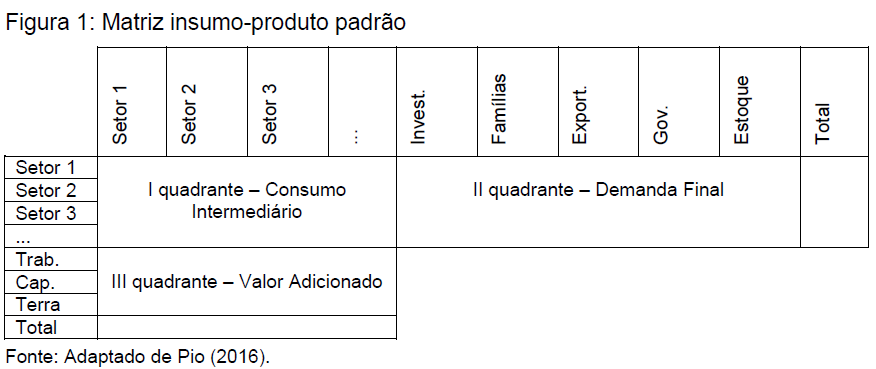

In [3]:
df_mip = pd.read_csv('C:/Users/Phillipe/Projetos/FIAP ATIVIDADES/AULA 1/Dados MIP P&D 2017.csv', skiprows=1, sep=';', skipfooter=34,
                     thousands='.', decimal=',')

C:\Users\Phillipe\AppData\Local\Temp\ipykernel_27344\3007074610.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_mip = pd.read_csv('C:/Users/Phillipe/Projetos/FIAP ATIVIDADES/AULA 1/Dados MIP P&D 2017.csv', skiprows=1, sep=';', skipfooter=34,


Apesar do P&D estar em um coluna dessa tabela ela ainda não foi incorporada no primeiro quadrante, para isso foi necessário realizar as operações mais a frente 

In [4]:
df_mip

,PRODUTO,PRODUTO.1,Unnamed: 2,0191,0192,0280,0580,0680,0791,0792,...,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,Valores correntes em 1 000 000 R$,NaN,NaN,"Agricultura, inclusive o apoio à agricultura e...","Pecuária, inclusive o apoio à pecuária",Produção florestal; pesca e aquicultura,Extração de carvão mineral e de minerais não-m...,"Extração de petróleo e gás, inclusive as ativi...","Extração de minério de ferro, inclusive benefi...","Extração de minerais metálicos não-ferrosos, i...",...,Variação\nde estoque,P&D,P&D,NaN,Demanda\nfinal,Demanda\ntotal,NaN,NaN,NaN,NaN
1,NaN,NaN,0.0,1,2,3,4,5,6,7,...,75,NaN,NaN,NaN,76,77,NaN,NaN,NaN,NaN
2,01911,"Agricultura, inclusive o apoio à agricultura e...",1.0,7615,4413,153,2,8,1,2,...,8224,NaN,3977.8,Agricultura (ASTI),191564,356847,NaN,0.0,0.0,0.0
3,01912,"Pecuária, inclusive o apoio à pecuária",2.0,937,5910,157,4,19,1,3,...,735,0,0.0,NaN,48645,147583,NaN,0.0,0.0,0.0
4,01913,Produção florestal; pesca e aquicultura,3.0,1185,1344,1983,2,2,0,0,...,25,0,0.0,NaN,20803,36146,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,23001,Saúde pública,64.0,0,0,0,0,0,4,0,...,0,0,0.0,NaN,192720,193090,NaN,0.0,0.0,0.0
66,23002,Saúde privada,65.0,0,0,0,0,1,0,0,...,0,0,0.0,NaN,236088,264751,NaN,0.0,0.0,0.0
67,23003,"Atividades artísticas, criativas e de espetáculos",66.0,2,13,3,1,21,1,0,...,0,0,0.0,NaN,32178,39310,NaN,0.0,0.0,0.0
68,24911,Organizações associativas e outros serviços pe...,67.0,137,38,22,39,779,264,60,...,0,0,0.0,NaN,127121,152325,NaN,0.0,0.0,0.0


In [5]:
def clean_data(df_mip):
   
    df_mip = df_mip.drop(columns=['PRODUTO','PRODUTO.1', 'Unnamed: 2', 'Unnamed: 72', 'Unnamed: 73', 
                                  'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77', 
                                  'Unnamed: 78', 'Unnamed: 80', 'Unnamed: 81', 'Unnamed: 82', 'Unnamed: 83', 
                                  'Unnamed: 84', 'Unnamed: 85', 'Unnamed: 86'], errors='ignore')
    
    df_mip.columns = df_mip.iloc[1]
    df_mip = df_mip[2:]
    df_mip = df_mip.reset_index(drop=True)
    df_mip = df_mip.apply(pd.to_numeric, errors='ignore')

    return df_mip

Mip = clean_data(df_mip.copy())
display(Mip)

C:\Users\Phillipe\AppData\Local\Temp\ipykernel_27344\2589927882.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_mip = df_mip.apply(pd.to_numeric, errors='ignore')


1,1,2,3,4,5,6,7,8,9,10,...,61,62,63,64,65,66,67,68,69,NaN
0,7615,4413,153,2,8,1,2,6984,30921,64809,...,1068,361,44,353,180,3,219,0,165283,3977.8
1,937,5910,157,4,19,1,3,82370,166,3908,...,253,121,19,105,118,4,35,0,98938,0.0
2,1185,1344,1983,2,2,0,0,1746,1,308,...,75,68,9,65,21,0,3,0,15343,0.0
3,101,347,12,237,609,1,1,59,11,250,...,58,16,1,7,6,1,4,0,17263,927.7
4,15,11,1,3,6318,157,28,44,1,426,...,538,7,11,2,6,10,15,0,88631,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,0,0,0,0,4,0,3,0,2,...,1,0,0,0,254,0,0,0,370,0.0
64,0,0,0,0,1,0,0,2,1,2,...,65,8,16,12,28243,14,11,0,28663,0.0
65,2,13,3,1,21,1,0,66,6,105,...,615,76,89,67,8,697,883,0,7132,0.0
66,137,38,22,39,779,264,60,233,89,253,...,583,107,495,1270,2597,24,503,0,25204,0.0


A soma das Colunas e Linhas para agregar o Setor de Extração (pois esta separado em 4 diferentes)

In [6]:
def soma_colunas(Mip):
    
    colunas_para_somar = ['4', '5', '6', '7'] #buscando pelo nome das colunas
    total_colunas = Mip[colunas_para_somar].sum(axis=1)
    Mip = Mip.drop(columns=colunas_para_somar)
    Mip.insert(3, '4', total_colunas) # Inserir a soma na posição 3

    return Mip

Nova_Mip = soma_colunas(Mip)
display(Nova_Mip)

1,1,2,3,4,8,9,10,11,12,13,...,61,62,63,64,65,66,67,68,69,NaN
0,7615,4413,153,13,6984,30921,64809,2107,4777,4557,...,1068,361,44,353,180,3,219,0,165283,3977.8
1,937,5910,157,27,82370,166,3908,72,196,165,...,253,121,19,105,118,4,35,0,98938,0.0
2,1185,1344,1983,4,1746,1,308,17,14,37,...,75,68,9,65,21,0,3,0,15343,0.0
3,101,347,12,848,59,11,250,16,0,1,...,58,16,1,7,6,1,4,0,17263,927.7
4,15,11,1,6506,44,1,426,81,0,68,...,538,7,11,2,6,10,15,0,88631,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,0,0,4,3,0,2,3,1,0,...,1,0,0,0,254,0,0,0,370,0.0
64,0,0,0,1,2,1,2,0,0,1,...,65,8,16,12,28243,14,11,0,28663,0.0
65,2,13,3,23,66,6,105,141,7,4,...,615,76,89,67,8,697,883,0,7132,0.0
66,137,38,22,1142,233,89,253,142,15,64,...,583,107,495,1270,2597,24,503,0,25204,0.0


In [7]:
def soma_linhas(Nova_Mip):
    
    soma_linhas = Nova_Mip.iloc[3:7].sum() #3-6 já que o python pega o ultimo elemento -1
    nova_linha = pd.DataFrame([soma_linhas])
    Nova_Mip = Nova_Mip.drop(index=[3, 4, 5, 6])
    Nova_Mip = pd.concat([Nova_Mip.iloc[:3], nova_linha, Nova_Mip.iloc[3:]]).reset_index(drop=True)

    return Nova_Mip

Mip_original = soma_linhas(Nova_Mip)
display(Mip_original)

1,1,2,3,4,8,9,10,11,12,13,...,61,62,63,64,65,66,67,68,69,NaN
0,7615.0,4413.0,153.0,13.0,6984.0,30921.0,64809.0,2107.0,4777.0,4557.0,...,1068.0,361.0,44.0,353.0,180.0,3.0,219.0,0.0,165283.0,3977.8
1,937.0,5910.0,157.0,27.0,82370.0,166.0,3908.0,72.0,196.0,165.0,...,253.0,121.0,19.0,105.0,118.0,4.0,35.0,0.0,98938.0,0.0
2,1185.0,1344.0,1983.0,4.0,1746.0,1.0,308.0,17.0,14.0,37.0,...,75.0,68.0,9.0,65.0,21.0,0.0,3.0,0.0,15343.0,0.0
3,118.0,360.0,13.0,9466.0,116.0,12.0,705.0,99.0,0.0,70.0,...,597.0,25.0,12.0,15.0,12.0,11.0,19.0,0.0,128433.0,927.7
4,51.0,1863.0,24.0,21.0,18682.0,1.0,2215.0,30.0,2.0,5.0,...,1634.0,1290.0,207.0,1271.0,715.0,5.0,165.0,0.0,49402.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.0,0.0,4.0,3.0,0.0,2.0,3.0,1.0,0.0,...,1.0,0.0,0.0,0.0,254.0,0.0,0.0,0.0,370.0,0.0
61,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,...,65.0,8.0,16.0,12.0,28243.0,14.0,11.0,0.0,28663.0,0.0
62,2.0,13.0,3.0,23.0,66.0,6.0,105.0,141.0,7.0,4.0,...,615.0,76.0,89.0,67.0,8.0,697.0,883.0,0.0,7132.0,0.0
63,137.0,38.0,22.0,1142.0,233.0,89.0,253.0,142.0,15.0,64.0,...,583.0,107.0,495.0,1270.0,2597.0,24.0,503.0,0.0,25204.0,0.0


In [8]:
Cons_Int_Total = Mip_original.iloc[:, 65]
PeD = Mip_original.iloc[:, 66] 
Mip_original = Mip_original.drop(Mip_original.columns[[65, 66]], axis=1)

- **Cons_Int_Total** = Consumo Intermediário Total  
- **PeD** = Gastos com P&D

Ambos serão usados para fazer as manipulações

In [9]:
Mip_original.columns = [str(i) for i in range(1, 66)] + list(Mip_original.columns[65:]) #reorganizar os titulos
Mip_original = Mip_original.reset_index(drop=True)
Mip_original.index = Mip_original.index + 1
display(Mip_original) 

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
1,7615.0,4413.0,153.0,13.0,6984.0,30921.0,64809.0,2107.0,4777.0,4557.0,...,114.0,0.0,1068.0,361.0,44.0,353.0,180.0,3.0,219.0,0.0
2,937.0,5910.0,157.0,27.0,82370.0,166.0,3908.0,72.0,196.0,165.0,...,32.0,0.0,253.0,121.0,19.0,105.0,118.0,4.0,35.0,0.0
3,1185.0,1344.0,1983.0,4.0,1746.0,1.0,308.0,17.0,14.0,37.0,...,2.0,0.0,75.0,68.0,9.0,65.0,21.0,0.0,3.0,0.0
4,118.0,360.0,13.0,9466.0,116.0,12.0,705.0,99.0,0.0,70.0,...,11.0,1.0,597.0,25.0,12.0,15.0,12.0,11.0,19.0,0.0
5,51.0,1863.0,24.0,21.0,18682.0,1.0,2215.0,30.0,2.0,5.0,...,6.0,1.0,1634.0,1290.0,207.0,1271.0,715.0,5.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.0,0.0,4.0,3.0,0.0,2.0,3.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,254.0,0.0,0.0,0.0
62,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,...,11.0,1.0,65.0,8.0,16.0,12.0,28243.0,14.0,11.0,0.0
63,2.0,13.0,3.0,23.0,66.0,6.0,105.0,141.0,7.0,4.0,...,71.0,6.0,615.0,76.0,89.0,67.0,8.0,697.0,883.0,0.0
64,137.0,38.0,22.0,1142.0,233.0,89.0,253.0,142.0,15.0,64.0,...,1151.0,36.0,583.0,107.0,495.0,1270.0,2597.0,24.0,503.0,0.0


Agora é possivel fazer as contas da matriz insumo produto, já que a matriz está quadrada

#### Matriz de transações intermediárias / SOMA da Matriz de transações intermediária

In [10]:
Cons_Int_Total.index = range(1, 66)
Mip_trans_inter = Mip_original.div(Cons_Int_Total, axis=0)
display(Mip_trans_inter)

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
1,0.046072,0.026700,0.000926,0.000079,0.042255,0.187079,0.392109,0.012748,0.028902,0.027571,...,0.000690,0.000000,0.006462,0.002184,0.000266,0.002136,0.001089,0.000018,0.001325,0.0
2,0.009471,0.059734,0.001587,0.000273,0.832542,0.001678,0.039499,0.000728,0.001981,0.001668,...,0.000323,0.000000,0.002557,0.001223,0.000192,0.001061,0.001193,0.000040,0.000354,0.0
3,0.077234,0.087597,0.129245,0.000261,0.113798,0.000065,0.020074,0.001108,0.000912,0.002412,...,0.000130,0.000000,0.004888,0.004432,0.000587,0.004236,0.001369,0.000000,0.000196,0.0
4,0.000919,0.002803,0.000101,0.073704,0.000903,0.000093,0.005489,0.000771,0.000000,0.000545,...,0.000086,0.000008,0.004648,0.000195,0.000093,0.000117,0.000093,0.000086,0.000148,0.0
5,0.001032,0.037711,0.000486,0.000425,0.378163,0.000020,0.044836,0.000607,0.000040,0.000101,...,0.000121,0.000020,0.033076,0.026112,0.004190,0.025728,0.014473,0.000101,0.003340,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.000000,0.000000,0.010811,0.008108,0.000000,0.005405,0.008108,0.002703,0.000000,...,0.000000,0.000000,0.002703,0.000000,0.000000,0.000000,0.686486,0.000000,0.000000,0.0
62,0.000000,0.000000,0.000000,0.000035,0.000070,0.000035,0.000070,0.000000,0.000000,0.000035,...,0.000384,0.000035,0.002268,0.000279,0.000558,0.000419,0.985347,0.000488,0.000384,0.0
63,0.000280,0.001823,0.000421,0.003225,0.009254,0.000841,0.014722,0.019770,0.000981,0.000561,...,0.009955,0.000841,0.086231,0.010656,0.012479,0.009394,0.001122,0.097729,0.123808,0.0
64,0.005436,0.001508,0.000873,0.045310,0.009245,0.003531,0.010038,0.005634,0.000595,0.002539,...,0.045667,0.001428,0.023131,0.004245,0.019640,0.050389,0.103039,0.000952,0.019957,0.0


#### Matriz ponderada pelos Inv. em P&D

In [11]:
PeD.index = range(1, 66)
Mip_PeD = Mip_trans_inter.mul(PeD, axis=0)
display(Mip_PeD)

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
1,183.267166,106.20591,3.682190,0.312866,168.081141,744.163367,1559.732339,50.708328,114.966153,109.671500,...,2.743593,0.000000,25.703130,8.688043,1.058930,8.495510,4.331988,0.072200,5.270586,0.0
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.852340,2.60036,0.093902,68.375014,0.837894,0.086679,5.092371,0.715099,0.000000,0.505626,...,0.079455,0.007223,4.312263,0.180581,0.086679,0.108348,0.086679,0.079455,0.137241,0.0
5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
62,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
63,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
64,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


#### Matriz de trans. intermediária modificada

In [12]:
Mip_Modificada = Mip_original - Mip_PeD
Mip_Modificada = Mip_Modificada.fillna(0)
Mip_Modificada

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
1,7431.732834,4306.79409,149.317810,12.687134,6815.918859,30176.836633,63249.267661,2056.291672,4662.033847,4447.328500,...,111.256407,0.000000,1042.296870,352.311957,42.941070,344.504490,175.668012,2.927800,213.729414,0.0
2,937.000000,5910.00000,157.000000,27.000000,82370.000000,166.000000,3908.000000,72.000000,196.000000,165.000000,...,32.000000,0.000000,253.000000,121.000000,19.000000,105.000000,118.000000,4.000000,35.000000,0.0
3,1185.000000,1344.00000,1983.000000,4.000000,1746.000000,1.000000,308.000000,17.000000,14.000000,37.000000,...,2.000000,0.000000,75.000000,68.000000,9.000000,65.000000,21.000000,0.000000,3.000000,0.0
4,117.147660,357.39964,12.906098,9397.624986,115.162106,11.913321,699.907629,98.284901,0.000000,69.494374,...,10.920545,0.992777,592.687737,24.819419,11.913321,14.891652,11.913321,10.920545,18.862759,0.0
5,51.000000,1863.00000,24.000000,21.000000,18682.000000,1.000000,2215.000000,30.000000,2.000000,5.000000,...,6.000000,1.000000,1634.000000,1290.000000,207.000000,1271.000000,715.000000,5.000000,165.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.00000,0.000000,4.000000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,254.000000,0.000000,0.000000,0.0
62,0.000000,0.00000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,...,11.000000,1.000000,65.000000,8.000000,16.000000,12.000000,28243.000000,14.000000,11.000000,0.0
63,2.000000,13.00000,3.000000,23.000000,66.000000,6.000000,105.000000,141.000000,7.000000,4.000000,...,71.000000,6.000000,615.000000,76.000000,89.000000,67.000000,8.000000,697.000000,883.000000,0.0
64,137.000000,38.00000,22.000000,1142.000000,233.000000,89.000000,253.000000,142.000000,15.000000,64.000000,...,1151.000000,36.000000,583.000000,107.000000,495.000000,1270.000000,2597.000000,24.000000,503.000000,0.0


Após todas essas manipulações finalmente temos uma matriz ponderada pelos gasto com P&D de cada setor

## Segundo Quadrante

    Nessa parte manipulei os dados do II quadrante - Demanda Final
    Após aquelas operações, um elemento chamado P&D foi incorporado na demanda final 

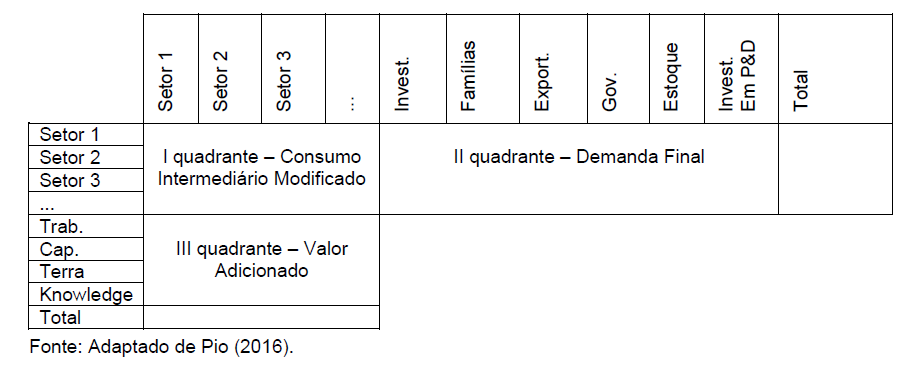

In [13]:
def clean_data(df_mip):

    df_mip = df_mip.iloc[:, 72:-9]  
    df_mip.columns = df_mip.iloc[0]  
    df_mip = df_mip[2:]  
    df_mip = df_mip.reset_index(drop=True)

    df_mip = df_mip.apply(pd.to_numeric, errors='ignore')

    soma_linhas = df_mip.iloc[3:7].sum() 
    nova_linha = pd.DataFrame([soma_linhas])
    df_mip = df_mip.drop(index=[3, 4, 5, 6])
    df_mip = pd.concat([df_mip.iloc[:3], nova_linha, df_mip.iloc[3:]]).reset_index(drop=True)
    return df_mip

Mult_vars = clean_data(df_mip.copy())
display(Mult_vars)

C:\Users\Phillipe\AppData\Local\Temp\ipykernel_27344\225362014.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_mip = df_mip.apply(pd.to_numeric, errors='ignore')


,Exportação\nde bens e\nserviços,Consumo\ndo governo,Consumo\ndas\n ISFLSF,Consumo \ndas famílias,Formação bruta\nde capital fixo,Variação\nde estoque
0,108365,33,0,71872,3072,8224
1,5653,4,0,25707,16546,735
2,2264,3,0,17477,1033,25
3,117038,0,0,700,9334,-2215
4,41984,124,0,180862,397,-427
...,...,...,...,...,...,...
60,3,189590,79,1651,1398,0
61,224,43119,8781,183859,105,0
62,1857,0,8383,21931,6,0
63,49,1,40888,86102,81,0


In [64]:
soma_total1 = Mip_PeD.sum(axis=1).reset_index(drop=True) #P&D 
Mult_vars['P&D'] = soma_total1

Mult_vars['Demanda_Final'] = Mult_vars.sum(axis=1)
Mult_vars = Mult_vars.reset_index(drop=True)

soma_total2 = Mip_Modificada.sum(axis=1).reset_index(drop=True)
Mult_vars['Consumo_Intermediario_Total'] = soma_total2

Mult_vars['Demanda_Total'] = Mult_vars['Consumo_Intermediario_Total'] + Mult_vars['Demanda_Final']
display(Mult_vars)

,Exportação\nde bens e\nserviços,Consumo\ndo governo,Consumo\ndas\n ISFLSF,Consumo \ndas famílias,Formação bruta\nde capital fixo,Variação\nde estoque,P&D,Demanda_Final,Consumo_Intermediario_Total,Demanda_Total
0,108365,33,0,71872,3072,8224,3977.775933,909239.775933,161304.224067,1070544.0
1,5653,4,0,25707,16546,735,0.000000,343803.000000,98934.000000,442737.0
2,2264,3,0,17477,1033,25,0.000000,93090.000000,15342.000000,108432.0
3,117038,0,0,700,9334,-2215,927.656661,632352.656661,127499.343339,759852.0
4,41984,124,0,180862,397,-427,0.000000,767618.000000,49399.000000,817017.0
...,...,...,...,...,...,...,...,...,...,...
60,3,189590,79,1651,1398,0,0.000000,578895.000000,366.000000,579261.0
61,224,43119,8781,183859,105,0,0.000000,765584.000000,28660.000000,794244.0
62,1857,0,8383,21931,6,0,0.000000,110799.000000,7134.000000,117933.0
63,49,1,40888,86102,81,0,0.000000,431765.000000,25201.000000,456966.0


## Terceiro Quadrante

    Nessa parte manipulei os dados do III quadrante - Valor Adicionado
    Agora surgiu um novo elemento chamado Capital Knowledge (Cap. Conhecimento) que representa o conhecimento adquirido com o invismento em P&D

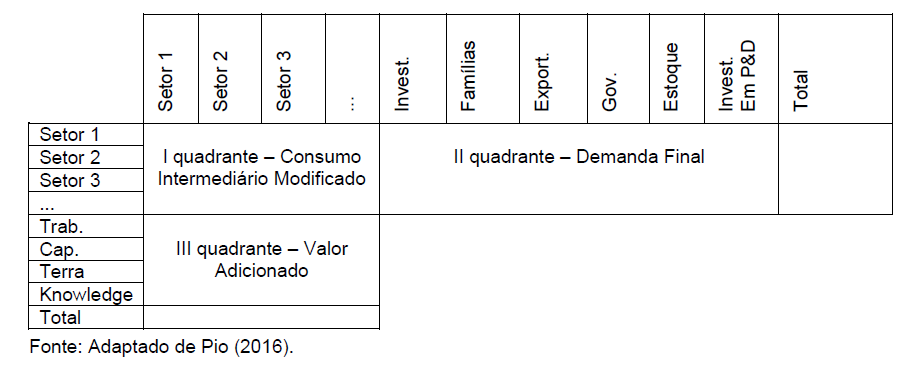

In [15]:
df_mip_inferior = pd.read_csv('C:/Users/Phillipe/Projetos/FIAP ATIVIDADES/AULA 1/Dados MIP P&D 2017.csv', skiprows=72, sep=';',thousands='.', decimal=',')
display(df_mip_inferior)

,Unnamed: 0,Prod Nac,69,126.346,61.747,7.506,8.880,74.697,28.498,9.312,...,4.386,Unnamed: 78,Unnamed: 79,Unnamed: 80,6.644.499,11.020.413,Unnamed: 83,0.1,0.2,0.3
0,NaN,Importado,70.0,17740.0,4543.0,460.0,1285.0,21707.0,4019.0,1556.0,...,0.0,NaN,NaN,NaN,251676.0,777137.0,NaN,0.0,0.0,0.0
1,NaN,Imp Import,71.0,503.0,160.0,17.0,62.0,313.0,152.0,42.0,...,0.0,NaN,NaN,NaN,13522.0,32284.0,NaN,0.0,0.0,0.0
2,NaN,ICMS Total,72.0,6895.0,3827.0,411.0,263.0,1599.0,710.0,225.0,...,0.0,NaN,NaN,NaN,276128.0,445654.0,NaN,0.0,0.0,0.0
3,NaN,Zeros,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0
4,NaN,IPI Total,74.0,83.0,98.0,8.0,41.0,111.0,80.0,21.0,...,0.0,NaN,NaN,NaN,31234.0,47041.0,NaN,0.0,0.0,0.0
5,NaN,Zeros,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0
6,NaN,Outros IIL Total,76.0,5177.0,1822.0,262.0,503.0,6483.0,1500.0,534.0,...,0.0,NaN,NaN,NaN,145556.0,388574.0,NaN,0.0,0.0,0.0
7,NaN,Zeros,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0
8,NaN,CONSUMO INTERMEDIÁRIO,78.0,156744.0,72197.0,8664.0,11034.0,104911.0,34958.0,11690.0,...,4386.0,NaN,NaN,NaN,7362616.0,12711103.0,NaN,0.0,0.0,0.0
9,R10,Remunerações,79.0,32555.0,23728.0,2350.0,4202.0,17664.0,3009.0,2452.0,...,0.0,NaN,NaN,NaN,0.0,2920537.0,NaN,0.0,0.0,0.0


In [16]:
def clean_data(df_mip_inferior):

    df_mip_inferior = df_mip_inferior.T
    df_mip_inferior = df_mip_inferior.iloc[:, :-9]
    df_mip_inferior.columns = df_mip_inferior.iloc[1]
    df_mip_inferior = df_mip_inferior[2:]
    df_mip_inferior = df_mip_inferior.reset_index(drop=True)
    df_mip_inferior = df_mip_inferior.iloc[:69]

    df_mip_inferior = df_mip_inferior.apply(pd.to_numeric, errors='ignore')

    df_mip_inferior = df_mip_inferior.drop(columns=['Zeros', 'CONSUMO INTERMEDIÁRIO', '   Salários', '   Contribuições sociais efetivas', 
                                              '      Previdência oficial /FGTS', '      Previdência privada', '   Contribuições sociais imputadas', 
                                              '   Rendimento misto bruto', '   Excedente operacional bruto (EOB)', 'VALOR ADICIONADO CUSTO FATORES', 
                                              'Valor adicionado bruto ( PIB )', 'VALOR DA PRODUÇÃO'])

    df_mip_inferior = df_mip_inferior.iloc[1:].reset_index(drop=True)


    soma_linhas = df_mip_inferior.iloc[3:7].sum() 
    nova_linha = pd.DataFrame([soma_linhas])
    df_mip_inferior = df_mip_inferior.drop(index=[3, 4, 5, 6])
    df_mip_inferior = pd.concat([df_mip_inferior.iloc[:3], nova_linha, df_mip_inferior.iloc[3:]]).reset_index(drop=True)
    
    return df_mip_inferior

Mip_inferior = clean_data(df_mip_inferior.copy())
display(Mip_inferior)


C:\Users\Phillipe\AppData\Local\Temp\ipykernel_27344\3230895822.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_mip_inferior = df_mip_inferior.apply(pd.to_numeric, errors='ignore')


Prod Nac,Importado,Imp Import,ICMS Total,IPI Total,Outros IIL Total,Remunerações,Excedente operacional bruto e rendimento misto bruto,Outros impostos sobre a produção,Outros subsídios à produção,Fator trabalho (ocupações)
0,17740.0,503.0,6895.0,83.0,5177.0,32555.0,176120.0,1686.0,-10258.0,6281108.0
1,4543.0,160.0,3827.0,98.0,1822.0,23728.0,51182.0,638.0,-162.0,5958292.0
2,460.0,17.0,411.0,8.0,262.0,2350.0,25027.0,145.0,-40.0,837997.0
3,28567.0,569.0,2797.0,253.0,9020.0,27327.0,61527.0,1964.0,-122.0,233295.0
4,5091.0,188.0,6906.0,298.0,5226.0,28453.0,14952.0,2278.0,-117.0,747518.0
...,...,...,...,...,...,...,...,...,...,...
60,6390.0,205.0,3222.0,130.0,1951.0,123561.0,6270.0,0.0,0.0,2147269.0
61,8858.0,522.0,6748.0,414.0,3073.0,79425.0,68685.0,2716.0,-150.0,3192028.0
62,1284.0,14.0,426.0,26.0,767.0,12768.0,8373.0,288.0,0.0,1072410.0
63,8608.0,115.0,3095.0,207.0,3055.0,41148.0,35579.0,1098.0,0.0,4267479.0


In [65]:
Mult_vars_inferior = Mip_inferior
Mult_vars_inferior['Prod_Nacional'] = Mip_Modificada.sum(axis=0).values
Mult_vars_inferior['Consumo_Intermediario'] = Mult_vars_inferior.iloc[:, :5].sum(axis=1) + Mult_vars_inferior['Prod_Nacional']
Mult_vars_inferior['Cap Know'] = Mip_PeD.sum(axis=0).values
Mult_vars_inferior['Valor_add_custo_fatores'] = Mult_vars_inferior['Remunerações'] + Mult_vars_inferior['Excedente operacional bruto e rendimento misto bruto'] + Mult_vars_inferior['Cap Know']
Mult_vars_inferior['Valor_add_bruto_PIB'] = Mult_vars_inferior['Outros impostos sobre a produção'] + Mult_vars_inferior['Outros subsídios à produção'] + Mult_vars_inferior['Valor_add_custo_fatores']
Mult_vars_inferior['Valor_da_producao'] = Mult_vars_inferior['Consumo_Intermediario'] + Mult_vars_inferior['Valor_add_bruto_PIB']

display(Mult_vars_inferior)

Prod Nac,Importado,Imp Import,ICMS Total,IPI Total,Outros IIL Total,Remunerações,Excedente operacional bruto e rendimento misto bruto,Outros impostos sobre a produção,Outros subsídios à produção,Fator trabalho (ocupações),Prod_Nacional,Consumo_Intermediario,Cap Know,Valor_add_custo_fatores,Valor_add_bruto_PIB,Valor_da_producao
0,17740.0,503.0,6895.0,83.0,5177.0,32555.0,176120.0,1686.0,-10258.0,6281108.0,125317.935510,155715.935510,1030.064490,209705.064490,201133.064490,356849.0
1,4543.0,160.0,3827.0,98.0,1822.0,23728.0,51182.0,638.0,-162.0,5958292.0,61184.107099,71634.107099,561.892901,75471.892901,75947.892901,147582.0
2,460.0,17.0,411.0,8.0,262.0,2350.0,25027.0,145.0,-40.0,837997.0,7479.654907,8637.654907,24.345093,27401.345093,27506.345093,36144.0
3,28567.0,569.0,2797.0,253.0,9020.0,27327.0,61527.0,1964.0,-122.0,233295.0,120585.492560,161791.492560,808.507440,89662.507440,91504.507440,253296.0
4,5091.0,188.0,6906.0,298.0,5226.0,28453.0,14952.0,2278.0,-117.0,747518.0,208364.461844,226073.461844,702.538156,44107.538156,46268.538156,272342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,6390.0,205.0,3222.0,130.0,1951.0,123561.0,6270.0,0.0,0.0,2147269.0,50666.102376,62564.102376,694.897624,130525.897624,130525.897624,193090.0
61,8858.0,522.0,6748.0,414.0,3073.0,79425.0,68685.0,2716.0,-150.0,3192028.0,93529.885489,113144.885489,931.114511,149041.114511,151607.114511,264752.0
62,1284.0,14.0,426.0,26.0,767.0,12768.0,8373.0,288.0,0.0,1072410.0,15305.531189,17822.531189,58.468811,21199.468811,21487.468811,39310.0
63,8608.0,115.0,3095.0,207.0,3055.0,41148.0,35579.0,1098.0,0.0,4267479.0,59052.878694,74132.878694,372.121306,77099.121306,78197.121306,152330.0


## Cálculo dos Multiplicadores

### Multiplicador de Produção

In [ ]:
Z = Mip_Modificada.values
x = Mult_vars_inferior['Valor_da_producao'].values

# Criando matriz de coeficientes técnicos
A = Z / x 

Matriz_Coef_Tec = pd.DataFrame(A, index=Mip_Modificada.index, columns=Mip_Modificada.columns)
Matriz_Coef_Tec

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
1,0.020826,0.029182,0.004131,0.000050,0.025027,0.481596,0.217807,0.027463,0.311737,0.087499,...,0.000461,0.000000,0.001283,0.001047,0.000322,0.001784,0.000664,0.000074,0.001403,0.0
2,0.002626,0.040046,0.004344,0.000107,0.302451,0.002649,0.013458,0.000962,0.013106,0.003246,...,0.000133,0.000000,0.000311,0.000359,0.000142,0.000544,0.000446,0.000102,0.000230,0.0
3,0.003321,0.009107,0.054864,0.000016,0.006411,0.000016,0.001061,0.000227,0.000936,0.000728,...,0.000008,0.000000,0.000092,0.000202,0.000067,0.000337,0.000079,0.000000,0.000020,0.0
4,0.000328,0.002422,0.000357,0.037101,0.000423,0.000190,0.002410,0.001313,0.000000,0.001367,...,0.000045,0.000024,0.000730,0.000074,0.000089,0.000077,0.000045,0.000278,0.000124,0.0
5,0.000143,0.012623,0.000664,0.000083,0.068598,0.000016,0.007628,0.000401,0.000134,0.000098,...,0.000025,0.000024,0.002012,0.003832,0.001550,0.006582,0.002701,0.000127,0.001083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.000000,0.000000,0.000016,0.000011,0.000000,0.000007,0.000040,0.000067,0.000000,...,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000959,0.000000,0.000000,0.0
62,0.000000,0.000000,0.000000,0.000004,0.000007,0.000016,0.000007,0.000000,0.000000,0.000020,...,0.000046,0.000024,0.000080,0.000024,0.000120,0.000062,0.106677,0.000356,0.000072,0.0
63,0.000006,0.000088,0.000083,0.000091,0.000242,0.000096,0.000362,0.001883,0.000468,0.000079,...,0.000294,0.000144,0.000757,0.000226,0.000667,0.000347,0.000030,0.017731,0.005797,0.0
64,0.000384,0.000257,0.000609,0.004509,0.000856,0.001420,0.000871,0.001896,0.001003,0.001259,...,0.004768,0.000861,0.000718,0.000318,0.003707,0.006577,0.009809,0.000611,0.003302,0.0


In [67]:
# Tamanho da matriz (assumindo que seja o mesmo da Mip_Modificada)
n = Mip_Modificada.shape[0]

# Criando a matriz identidade
I = np.identity(n)
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
i_a = I - Matriz_Coef_Tec
i_a

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
1,0.979174,-0.029182,-0.004131,-0.000050,-0.025027,-0.481596,-0.217807,-0.027463,-0.311737,-0.087499,...,-0.000461,0.000000,-0.001283,-0.001047,-0.000322,-0.001784,-0.000664,-0.000074,-0.001403,0.0
2,-0.002626,0.959954,-0.004344,-0.000107,-0.302451,-0.002649,-0.013458,-0.000962,-0.013106,-0.003246,...,-0.000133,0.000000,-0.000311,-0.000359,-0.000142,-0.000544,-0.000446,-0.000102,-0.000230,0.0
3,-0.003321,-0.009107,0.945136,-0.000016,-0.006411,-0.000016,-0.001061,-0.000227,-0.000936,-0.000728,...,-0.000008,0.000000,-0.000092,-0.000202,-0.000067,-0.000337,-0.000079,0.000000,-0.000020,0.0
4,-0.000328,-0.002422,-0.000357,0.962899,-0.000423,-0.000190,-0.002410,-0.001313,0.000000,-0.001367,...,-0.000045,-0.000024,-0.000730,-0.000074,-0.000089,-0.000077,-0.000045,-0.000278,-0.000124,0.0
5,-0.000143,-0.012623,-0.000664,-0.000083,0.931402,-0.000016,-0.007628,-0.000401,-0.000134,-0.000098,...,-0.000025,-0.000024,-0.002012,-0.003832,-0.001550,-0.006582,-0.002701,-0.000127,-0.001083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.000000,0.000000,-0.000016,-0.000011,0.000000,-0.000007,-0.000040,-0.000067,0.000000,...,0.000000,0.000000,-0.000001,0.000000,0.000000,1.000000,-0.000959,0.000000,0.000000,0.0
62,0.000000,0.000000,0.000000,-0.000004,-0.000007,-0.000016,-0.000007,0.000000,0.000000,-0.000020,...,-0.000046,-0.000024,-0.000080,-0.000024,-0.000120,-0.000062,0.893323,-0.000356,-0.000072,0.0
63,-0.000006,-0.000088,-0.000083,-0.000091,-0.000242,-0.000096,-0.000362,-0.001883,-0.000468,-0.000079,...,-0.000294,-0.000144,-0.000757,-0.000226,-0.000667,-0.000347,-0.000030,0.982269,-0.005797,0.0
64,-0.000384,-0.000257,-0.000609,-0.004509,-0.000856,-0.001420,-0.000871,-0.001896,-0.001003,-0.001259,...,-0.004768,-0.000861,-0.000718,-0.000318,-0.003707,-0.006577,-0.009809,-0.000611,0.996698,0.0


In [21]:
matriz_inversa = np.linalg.pinv(i_a)
matriz_inversa 

array([[1.02674260e+00, 5.72637670e-02, 1.24163125e-02, ...,
        1.89057744e-03, 7.50791651e-03, 0.00000000e+00],
       [3.27952561e-03, 1.04821909e+00, 5.62842096e-03, ...,
        5.11712855e-04, 3.01489185e-03, 0.00000000e+00],
       [4.18407782e-03, 1.11691637e-02, 1.05840802e+00, ...,
        3.78583363e-04, 7.79221975e-04, 0.00000000e+00],
       ...,
       [2.30001802e-04, 4.61884238e-04, 2.67020973e-04, ...,
        1.01918084e+00, 6.44210565e-03, 0.00000000e+00],
       [1.50785197e-03, 1.60203983e-03, 1.27467767e-03, ...,
        2.16205151e-03, 1.00507807e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [22]:
multi_prod = matriz_inversa.sum(axis=0)
multi_prod

array([1.65842846, 1.78629602, 1.35724612, 1.8338783 , 2.41082298,
       2.2511488 , 2.22502138, 2.14054489, 2.12143026, 1.98283019,
       1.82132117, 1.94828668, 1.91175353, 2.01795501, 1.81580271,
       2.21350195, 2.26325201, 1.95741466, 1.98001539, 2.07784718,
       1.71123378, 2.0005226 , 2.05349086, 2.17098653, 2.09748861,
       2.02067973, 1.76312125, 2.06482864, 1.94048139, 2.23840024,
       2.07034438, 1.76848975, 1.82954967, 1.81330254, 1.93969843,
       1.55810727, 1.87083383, 1.58929109, 1.54410889, 1.96042752,
       1.76693971, 1.87130126, 1.57956368, 1.69859094, 1.81932091,
       1.75415599, 1.81497602, 1.77473722, 1.4096972 , 1.44089694,
       1.11415235, 1.43560406, 1.50044542, 1.99540663, 1.46651622,
       1.43652636, 1.23673303, 1.37232097, 1.21663682, 1.39928803,
       1.43924864, 1.57341468, 1.6085721 , 1.65385969, 1.        ])

In [23]:
def plot_multiplicador(dados, titulo='Multiplicador de Produção Direto', xlabel='Setores', ylabel='Valor em R$'):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Define as cores personalizadas
    cor_verde = '#19CC09'     # Barras 1-3
    cor_laranja = '#E66C37'   # Barra 4
    cor_cinza = '#B3B3B3'     # Barras 5-34
    cor_amarelo = '#E3D729'   # Barras 35-37
    cor_azul = '#414FB1'      # Barras 38-65

    # Aplica as cores com base nos intervalos definidos
    colors = []
    for i in range(len(dados)):
        if i in range(0, 3):
            colors.append(cor_verde)
        elif i == 3:
            colors.append(cor_laranja)
        elif i in range(4, 34):
            colors.append(cor_cinza)
        elif i in range(34, 37):
            colors.append(cor_amarelo)
        elif i in range(37, len(dados)):
            colors.append(cor_azul)

    # Gráfico de barras no eixo principal
    bars = ax.bar(range(len(dados)), dados, color=colors, width=0.8)

    # Cálculo da média
    media = sum(dados) / len(dados)

    # Limite superior do eixo y
    ymax = max(dados) * 1.15
    ax.set_ylim(top=ymax)

    # Eixo X
    ax.set_xticks(range(len(dados)))
    ax.set_xticklabels(range(1, len(dados) + 1), rotation=90)

    # Rótulos e título
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(titulo)

    # Adiciona eixo secundário à direita para exibir a média
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())  # Sincroniza limites com o eixo principal
    ax2.axhline(media, color='red', linestyle='--', linewidth=1.5)
    ax2.set_yticks([media])
    ax2.set_yticklabels([f'Média: {media:.3f}'], color='red')
    ax2.tick_params(axis='y', colors='red')

    # Remove os ticks da direita fora da linha de média
    ax2.spines['right'].set_visible(True)
    ax2.spines['right'].set_color('red')

    # Legenda
    legendas = [
        mpatches.Patch(color=cor_verde, label='Agrop.'),
        mpatches.Patch(color=cor_laranja, label='Indust. Extrat.'),
        mpatches.Patch(color=cor_cinza, label='Indust. Transf.'),
        mpatches.Patch(color=cor_amarelo, label='SIUP + Construção'),
        mpatches.Patch(color=cor_azul, label='Serviços')
    ]
    ax.legend(handles=legendas)

    plt.tight_layout()
    plt.show()

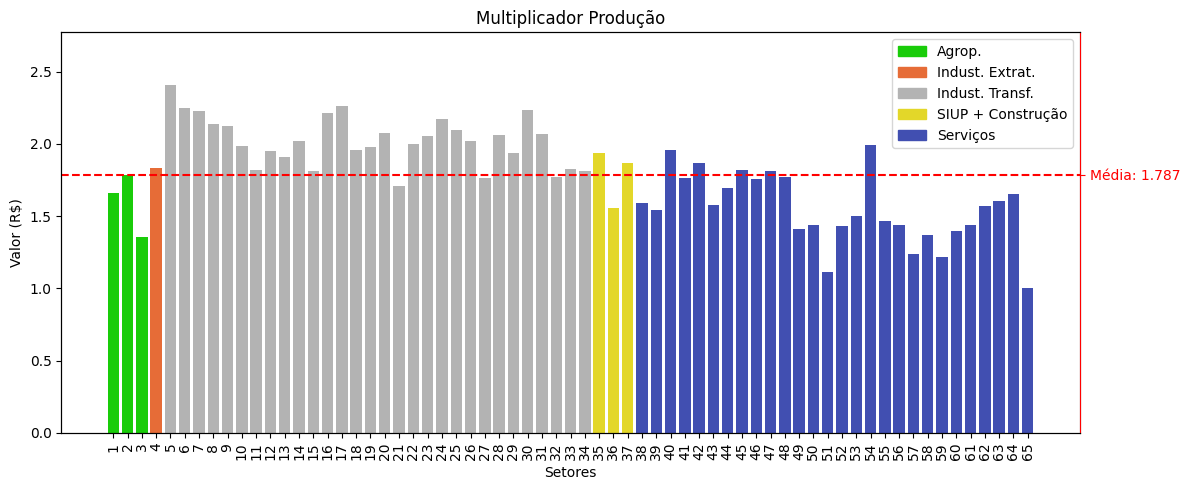

In [24]:
plot_multiplicador(multi_prod, titulo='Multiplicador Produção', xlabel='Setores', ylabel='Valor (R$)')

#### Decomposição do Multiplicador de Produção 

In [25]:
multi_prod_efeito_direto = Matriz_Coef_Tec.sum(axis=0)
multi_prod_efeito_direto

1     0.351179
2     0.414577
3     0.206940
4     0.476066
5     0.765084
        ...   
61    0.262396
62    0.353274
63    0.389355
64    0.387664
65    0.000000
Length: 65, dtype: float64

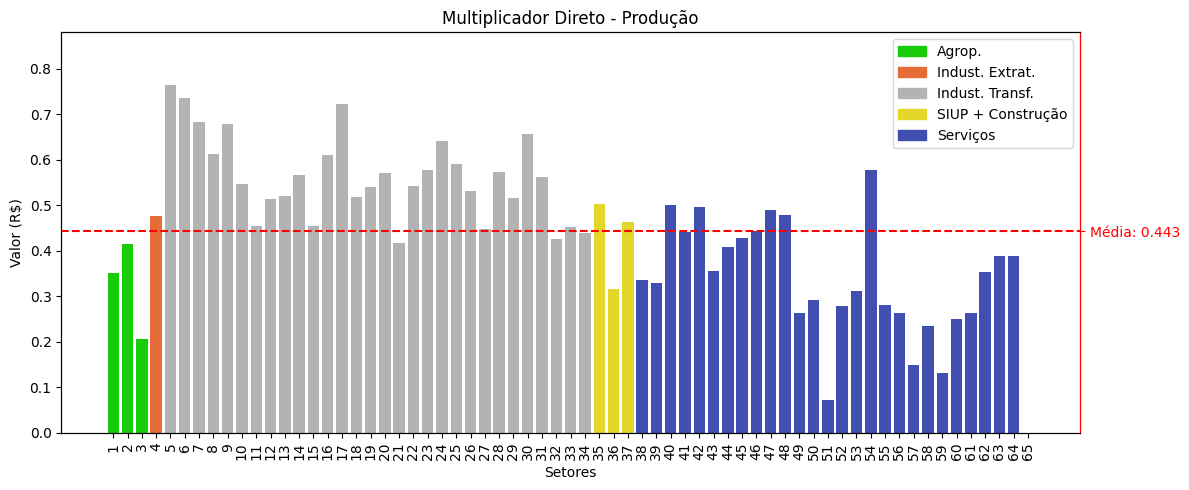

In [26]:
plot_multiplicador(multi_prod_efeito_direto, titulo='Multiplicador Direto - Produção', xlabel='Setores', ylabel='Valor (R$)')

In [27]:
multi_prod_efeito_indireto = multi_prod - multi_prod_efeito_direto
multi_prod_efeito_indireto

1     1.307249
2     1.371719
3     1.150306
4     1.357813
5     1.645739
        ...   
61    1.176852
62    1.220141
63    1.219217
64    1.266196
65    1.000000
Length: 65, dtype: float64

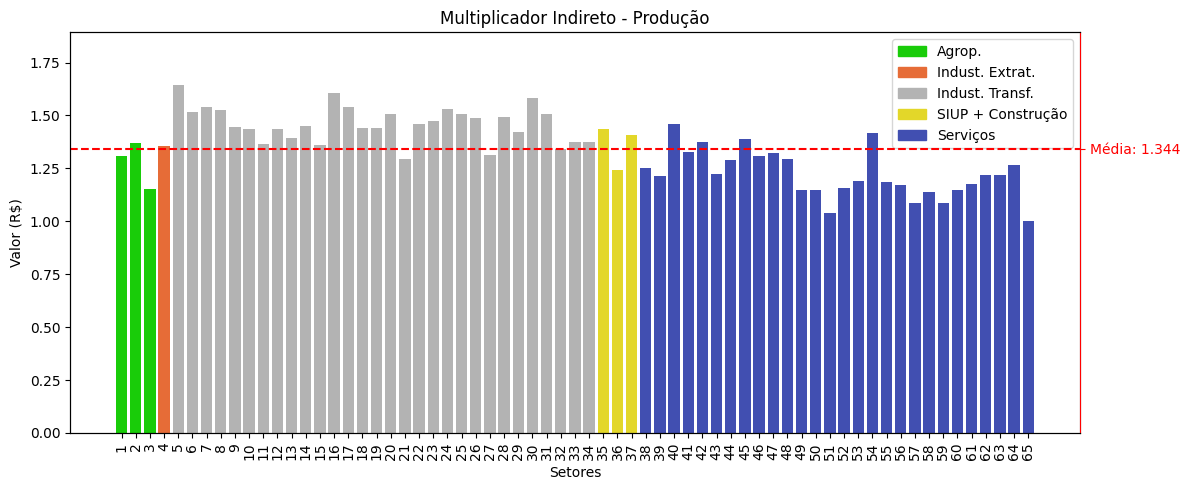

In [28]:
plot_multiplicador(multi_prod_efeito_indireto, titulo='Multiplicador Indireto - Produção', xlabel='Setores', ylabel='Valor (R$)')

### Multiplicador de Emprego

In [29]:
Coef_emprego = Mult_vars_inferior['Fator trabalho (ocupações)'] / Mult_vars_inferior['Valor_da_producao']
Coef_emprego 

0     17.601585
1     40.372755
2     23.184955
3      0.921037
4      2.744777
        ...    
60    11.120560
61    12.056672
62    27.280845
63    28.014698
64    90.733550
Length: 65, dtype: float64

In [30]:
C_e = np.diag(Coef_emprego)
C_e

array([[17.60158498,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 40.37275549,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 23.18495463, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 27.28084457,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        28.01469835,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 90.73354978]])

In [31]:
matriz_inversa_prod = C_e @ matriz_inversa
matriz_inversa_prod

array([[1.80722971e+01, 1.00793306e+00, 2.18546779e-01, ...,
        3.32771596e-02, 1.32151230e-01, 0.00000000e+00],
       [1.32403485e-01, 4.23194929e+01, 2.27234863e-01, ...,
        2.06592580e-02, 1.21719491e-01, 0.00000000e+00],
       [9.70076544e-02, 2.58956554e-01, 2.45391419e+01, ...,
        8.77743808e-03, 1.80662261e-02, 0.00000000e+00],
       ...,
       [6.27464342e-03, 1.26005921e-02, 7.28455766e-03, ...,
        2.78041140e+01, 1.75746083e-01, 0.00000000e+00],
       [4.22420180e-02, 4.48806625e-02, 3.57097104e-02, ...,
        6.05692208e-02, 2.81569588e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.07335498e+01]])

In [32]:
mult_emprego = matriz_inversa_prod.sum(axis=0)
mult_emprego

array([21.19513328, 47.41391947, 26.68257507,  6.27984927, 24.83782507,
       16.10350978, 16.12781957, 10.8605815 , 13.75706017, 21.05172068,
       34.3208712 , 19.25892704, 21.32124413,  9.19227528, 15.294476  ,
        5.20632435, 15.05966529,  5.4110461 ,  6.77820831, 10.17259643,
        6.92789948,  9.75891601, 14.27530825,  7.65961988,  7.76219349,
       13.29094593,  6.83214601,  9.36749211,  9.63705065,  9.22659127,
        9.90480609,  7.15167864, 16.98570927, 12.19269017,  3.96871649,
       10.96889194, 20.94714486, 21.89625064, 19.18778296, 16.57807916,
        7.07024788,  6.95761745, 10.95602153, 22.95430403, 27.17865175,
       13.90655644, 10.84378542,  7.91309606,  8.34219861,  4.81117393,
        1.35115017, 12.03285667, 14.17806745, 12.38203749, 10.40477589,
       20.04285312, 21.02319604,  8.90788087, 14.33396811, 22.41587114,
       15.64637836, 17.72189645, 31.54422106, 33.91347023, 90.73354978])

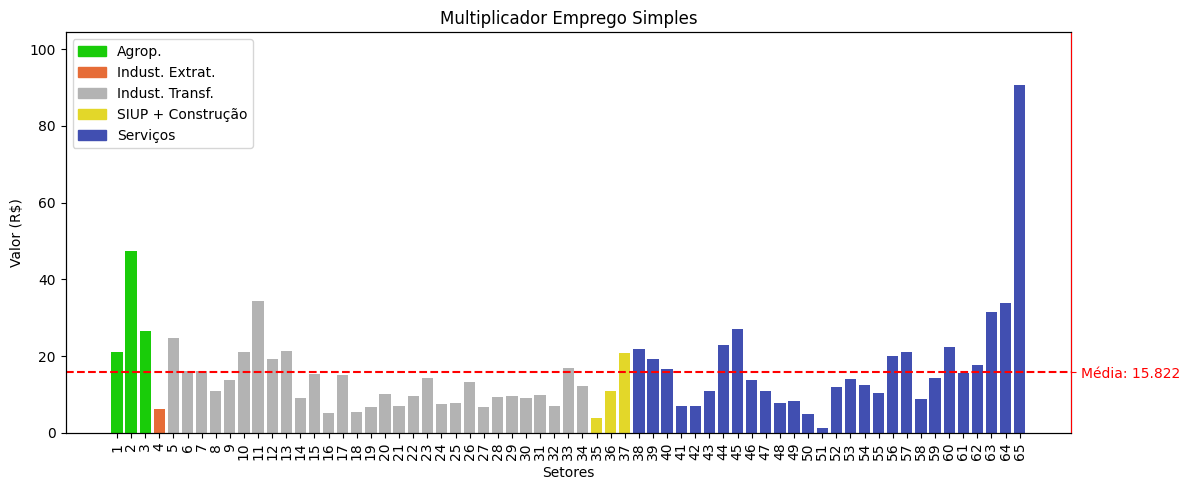

In [33]:
plot_multiplicador(mult_emprego, titulo='Multiplicador Emprego Simples', xlabel='Setores', ylabel='Valor (R$)')

In [34]:
mult_emprego_t1 = mult_emprego / Coef_emprego
mult_emprego_t1

0     1.204160
1     1.174404
2     1.150857
3     6.818237
4     9.049124
        ...   
60    1.406978
61    1.469883
62    1.156277
63    1.210560
64    1.000000
Length: 65, dtype: float64

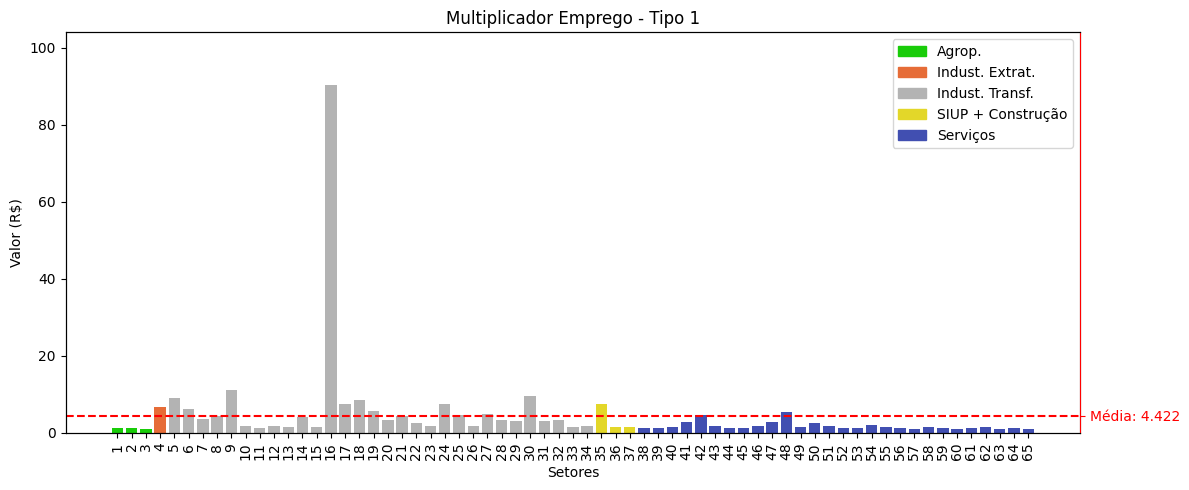

In [35]:
plot_multiplicador(mult_emprego_t1, titulo='Multiplicador Emprego - Tipo 1', xlabel='Setores', ylabel='Valor (R$)')

### Multiplicador da Renda

In [36]:
Coef_renda = Mult_vars_inferior['Remunerações'] / Mult_vars_inferior['Valor_da_producao']
Coef_renda 

0     0.091229
1     0.160778
2     0.065018
3     0.107886
4     0.104475
        ...   
60    0.639914
61    0.299998
62    0.324803
63    0.270124
64    1.000000
Length: 65, dtype: float64

In [37]:
C_r = np.diag(Coef_renda)
C_r

array([[0.09122906, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16077841, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06501771, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.32480285, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27012407,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [38]:
matriz_inversa_renda = C_r @ matriz_inversa
matriz_inversa_renda

array([[9.36687653e-02, 5.22411982e-03, 1.13272856e-03, ...,
        1.72475609e-04, 6.84940190e-04, 0.00000000e+00],
       [5.27276928e-04, 1.68531003e-01, 9.04928599e-04, ...,
        8.22723816e-05, 4.84729532e-04, 0.00000000e+00],
       [2.72039146e-04, 7.26193413e-04, 6.88152624e-02, ...,
        2.46146221e-05, 5.06632260e-05, 0.00000000e+00],
       ...,
       [7.47052407e-05, 1.50021316e-04, 8.67291728e-05, ...,
        3.31032839e-01, 2.09241427e-03, 0.00000000e+00],
       [4.07307114e-04, 4.32749523e-04, 3.44321124e-04, ...,
        5.84022158e-04, 2.71495780e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [39]:
mult_renda = matriz_inversa_renda.sum(axis=0)
mult_renda

array([0.19744547, 0.29456153, 0.12471142, 0.28541282, 0.36739201,
       0.34707797, 0.34059189, 0.36761143, 0.32365259, 0.40311759,
       0.47135847, 0.45641558, 0.40885289, 0.35065853, 0.48099077,
       0.18762392, 0.33364685, 0.24570519, 0.30473127, 0.34201724,
       0.34306004, 0.38490956, 0.46824087, 0.33826377, 0.30051182,
       0.44437303, 0.27116556, 0.42598178, 0.44418399, 0.40090818,
       0.44661945, 0.36829019, 0.40255285, 0.35469705, 0.20289617,
       0.40337194, 0.37531068, 0.41468962, 0.44264998, 0.40787377,
       0.4148296 , 0.34414806, 0.49885452, 0.56993632, 0.36733462,
       0.54979614, 0.46505081, 0.30965105, 0.47102057, 0.37293   ,
       0.04103316, 0.38687619, 0.46828259, 0.40380521, 0.3589987 ,
       0.55945425, 0.78533205, 0.71850594, 0.86539611, 0.69814479,
       0.75346033, 0.44435128, 0.45248012, 0.42427833, 1.        ])

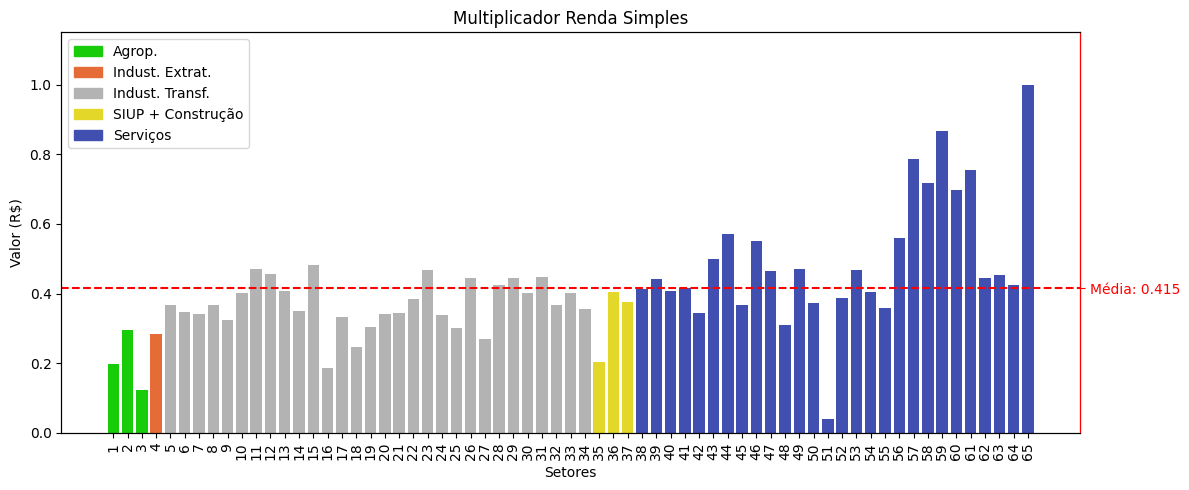

In [40]:
plot_multiplicador(mult_renda, titulo='Multiplicador Renda Simples', xlabel='Setores', ylabel='Valor (R$)')

In [41]:
mult_renda_t1 = mult_renda / Coef_renda
mult_renda_t1

0     2.164283
1     1.832096
2     1.918115
3     2.645513
4     3.516546
        ...   
60    1.177440
61    1.481182
62    1.393092
63    1.570679
64    1.000000
Length: 65, dtype: float64

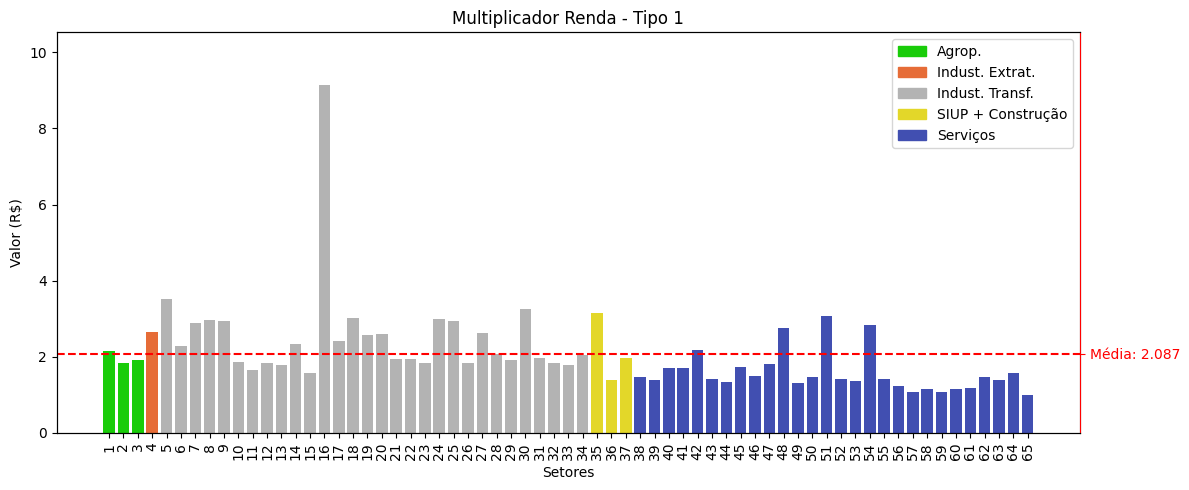

In [42]:
plot_multiplicador(mult_renda_t1, titulo='Multiplicador Renda - Tipo 1', xlabel='Setores', ylabel='Valor (R$)')

### Multiplicador Capital Knowledge

In [43]:
Coef_know = Mult_vars_inferior['Cap Know'] / Mult_vars_inferior['Valor_da_producao']
Coef_know 

0     0.002887
1     0.003807
2     0.000674
3     0.003192
4     0.002580
        ...   
60    0.003599
61    0.003517
62    0.001487
63    0.002443
64    0.000000
Length: 65, dtype: float64

In [44]:
C_k = np.diag(Coef_know)
C_k

array([[0.00288656, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00380733, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00067356, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00148738, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00244286,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
matriz_inversa_know = C_k @ matriz_inversa
matriz_inversa_know

array([[2.96374962e-03, 1.65295049e-04, 3.58403767e-05, ...,
        5.45725697e-06, 2.16720187e-05, 0.00000000e+00],
       [1.24862257e-05, 3.99091260e-03, 2.14292378e-05, ...,
        1.94825805e-06, 1.14786785e-05, 0.00000000e+00],
       [2.81822056e-06, 7.52308350e-06, 7.12899560e-04, ...,
        2.54997985e-07, 5.24851469e-07, 0.00000000e+00],
       ...,
       [3.42099513e-07, 6.86996237e-07, 3.97160995e-07, ...,
        1.51590667e-03, 9.58184320e-06, 0.00000000e+00],
       [3.68347563e-06, 3.91356366e-06, 3.11386279e-06, ...,
        5.28159542e-06, 2.45526792e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [46]:
mult_know = matriz_inversa_know.sum(axis=0)
mult_know

array([0.00516589, 0.0067959 , 0.00180548, 0.00602475, 0.00757879,
       0.01773925, 0.01246017, 0.0069501 , 0.01205252, 0.00697938,
       0.00449542, 0.00970933, 0.00409851, 0.00603531, 0.00610948,
       0.01027539, 0.01702192, 0.00682795, 0.0080041 , 0.01159666,
       0.00896239, 0.00734277, 0.00661381, 0.00706505, 0.00616654,
       0.00700913, 0.01602915, 0.00930417, 0.00998865, 0.024847  ,
       0.01097565, 0.04369607, 0.00493911, 0.01360806, 0.00666349,
       0.00357796, 0.0055172 , 0.00642678, 0.00298166, 0.00637989,
       0.00388573, 0.00410264, 0.00675691, 0.00372355, 0.00441452,
       0.00383771, 0.00376132, 0.00827463, 0.00428872, 0.00229297,
       0.00039377, 0.00232324, 0.00834232, 0.00598439, 0.00283621,
       0.00315881, 0.00152374, 0.00265063, 0.00204701, 0.00199015,
       0.00495429, 0.00522057, 0.00303034, 0.00424583, 0.        ])

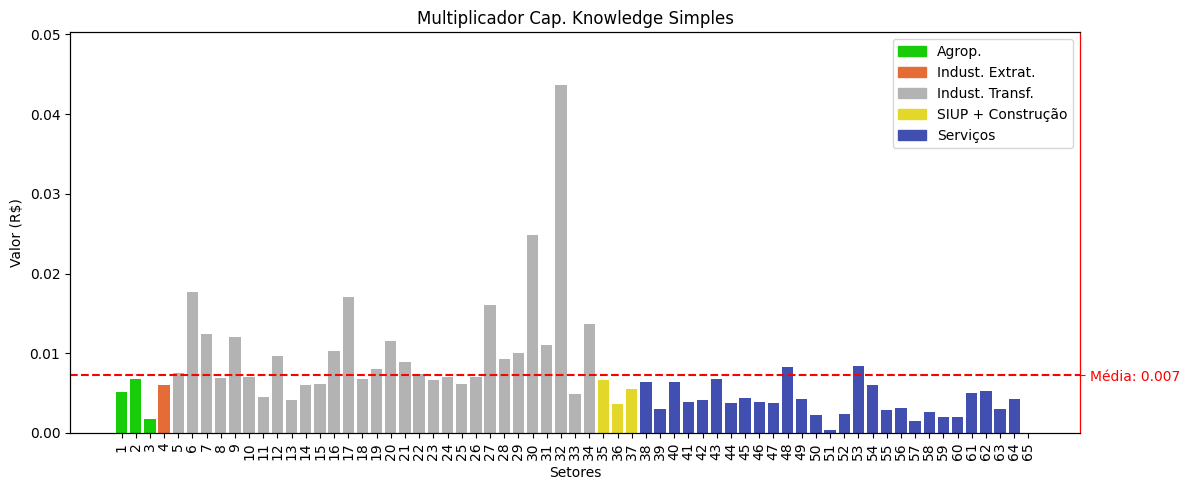

In [47]:
plot_multiplicador(mult_know, titulo='Multiplicador Cap. Knowledge Simples', xlabel='Setores', ylabel='Valor (R$)')

In [48]:
mult_know_t1 = mult_know / Coef_renda
mult_know_t1

0     0.056626
1     0.042269
2     0.027769
3     0.055844
4     0.072541
        ...   
60    0.007742
61    0.017402
62    0.009330
63    0.015718
64    0.000000
Length: 65, dtype: float64

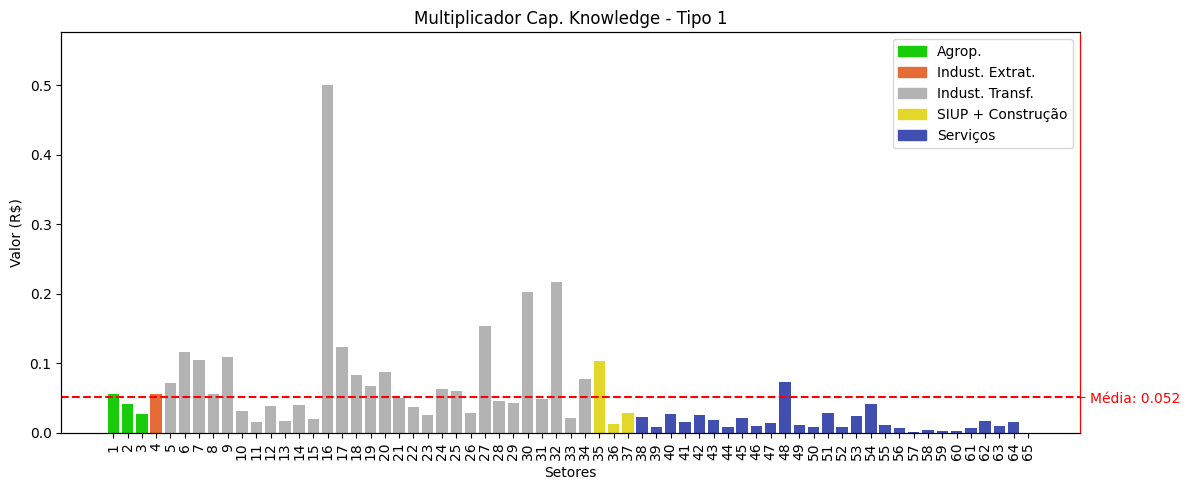

In [49]:
plot_multiplicador(mult_know_t1, titulo='Multiplicador Cap. Knowledge - Tipo 1', xlabel='Setores', ylabel='Valor (R$)')

## Índice de Ligação

#### Para Frente

In [50]:
B_i = matriz_inversa.sum(axis=1)
B_i

array([3.247373  , 1.58773519, 1.30922269, 2.63546922, 1.35045371,
       1.22126111, 1.74051134, 1.25725908, 1.020805  , 1.65628752,
       1.07731507, 1.11469209, 1.30814564, 1.90307346, 1.32218202,
       4.02071767, 1.22419333, 3.13330649, 1.92753396, 1.10780759,
       1.13228651, 2.10304046, 1.48922588, 2.00618168, 1.68445959,
       1.82088115, 1.35945317, 1.44733108, 1.57033234, 1.04838184,
       1.68134038, 1.14703828, 1.16523292, 2.06827757, 3.5071684 ,
       1.46489612, 1.61424483, 1.54884006, 6.50540971, 3.84653775,
       1.21555566, 1.25585588, 2.17614502, 1.1328519 , 1.29537715,
       1.08148978, 1.94613021, 1.65480163, 1.77206507, 4.00199303,
       1.88647059, 3.36499601, 1.27823765, 2.1289918 , 1.48877984,
       2.68712084, 1.38025342, 1.28937974, 1.02387135, 1.17624871,
       1.00296888, 1.12368781, 1.14653367, 1.27337899, 1.        ])

In [51]:
B_i_n =  B_i / 65 #número de setores
B_i_n 

array([0.04995958, 0.0244267 , 0.02014189, 0.04054568, 0.02077621,
       0.01878863, 0.0267771 , 0.01934245, 0.01570469, 0.02548135,
       0.01657408, 0.01714911, 0.02012532, 0.02927805, 0.02034126,
       0.06185719, 0.01883374, 0.04820472, 0.02965437, 0.01704319,
       0.01741979, 0.03235447, 0.02291117, 0.03086433, 0.02591476,
       0.02801356, 0.02091466, 0.02226663, 0.02415896, 0.01612895,
       0.02586678, 0.01764674, 0.01792666, 0.03181965, 0.05395644,
       0.02253686, 0.02483454, 0.02382831, 0.10008323, 0.0591775 ,
       0.01870086, 0.01932086, 0.03347915, 0.01742849, 0.01992888,
       0.0166383 , 0.02994046, 0.02545849, 0.02726254, 0.06156912,
       0.02902262, 0.05176917, 0.01966519, 0.03275372, 0.02290431,
       0.04134032, 0.02123467, 0.01983661, 0.01575187, 0.01809613,
       0.01543029, 0.0172875 , 0.01763898, 0.01959045, 0.01538462])

#### Para Trás

In [52]:
B_j = matriz_inversa.sum(axis=0)
B_j

array([1.65842846, 1.78629602, 1.35724612, 1.8338783 , 2.41082298,
       2.2511488 , 2.22502138, 2.14054489, 2.12143026, 1.98283019,
       1.82132117, 1.94828668, 1.91175353, 2.01795501, 1.81580271,
       2.21350195, 2.26325201, 1.95741466, 1.98001539, 2.07784718,
       1.71123378, 2.0005226 , 2.05349086, 2.17098653, 2.09748861,
       2.02067973, 1.76312125, 2.06482864, 1.94048139, 2.23840024,
       2.07034438, 1.76848975, 1.82954967, 1.81330254, 1.93969843,
       1.55810727, 1.87083383, 1.58929109, 1.54410889, 1.96042752,
       1.76693971, 1.87130126, 1.57956368, 1.69859094, 1.81932091,
       1.75415599, 1.81497602, 1.77473722, 1.4096972 , 1.44089694,
       1.11415235, 1.43560406, 1.50044542, 1.99540663, 1.46651622,
       1.43652636, 1.23673303, 1.37232097, 1.21663682, 1.39928803,
       1.43924864, 1.57341468, 1.6085721 , 1.65385969, 1.        ])

In [53]:
B_j_n =  B_j / 65 #número de setores
B_j_n 

array([0.02551428, 0.02748148, 0.02088071, 0.02821351, 0.03708958,
       0.03463306, 0.0342311 , 0.03293146, 0.03263739, 0.03050508,
       0.02802033, 0.02997364, 0.02941159, 0.03104546, 0.02793543,
       0.03405388, 0.03481926, 0.03011407, 0.03046178, 0.03196688,
       0.02632667, 0.03077727, 0.03159217, 0.03339979, 0.03226906,
       0.03108738, 0.02712494, 0.03176659, 0.02985356, 0.03443693,
       0.03185145, 0.02720753, 0.02814692, 0.02789696, 0.02984151,
       0.02397088, 0.02878206, 0.02445063, 0.02375552, 0.03016042,
       0.02718369, 0.02878925, 0.02430098, 0.02613217, 0.02798955,
       0.02698702, 0.02792271, 0.02730365, 0.02168765, 0.02216765,
       0.01714081, 0.02208622, 0.02308378, 0.03069856, 0.02256179,
       0.02210041, 0.01902666, 0.02111263, 0.01871749, 0.02152751,
       0.02214229, 0.02420638, 0.02474726, 0.025444  , 0.01538462])

In [54]:
n2 = 65*65
B_ = matriz_inversa.sum()
Bº = B_/n2
Bº

0.027493275635114504

#### Ui e Uj > 1 = Setor Chave

In [55]:
Ui = B_i_n / Bº
Ui

array([1.8171565 , 0.88846071, 0.73261142, 1.47474898, 0.75568336,
       0.6833901 , 0.97395079, 0.70353376, 0.5712194 , 0.92682105,
       0.60284115, 0.62375649, 0.73200872, 1.06491688, 0.73986316,
       2.24990269, 0.68503091, 1.75332746, 1.07860442, 0.61990408,
       0.63360193, 1.17681389, 0.83333713, 1.12261391, 0.9425855 ,
       1.01892392, 0.76071926, 0.80989375, 0.87872247, 0.58665077,
       0.94084006, 0.64185669, 0.65203799, 1.15736136, 1.96253214,
       0.81972275, 0.90329491, 0.86669588, 3.64028018, 2.15243555,
       0.68019746, 0.70274855, 1.21772155, 0.63391831, 0.72486376,
       0.60517723, 1.08901046, 0.92598957, 0.99160754, 2.23942481,
       1.05562628, 1.88297568, 0.71527289, 1.19133567, 0.83308754,
       1.50365206, 0.77235861, 0.72150775, 0.57293526, 0.65820218,
       0.56123871, 0.62879029, 0.64157432, 0.71255409, 0.55957739])

In [56]:
Uj = B_j_n / Bº
Uj

array([0.92801907, 0.99957086, 0.75948424, 1.02619683, 1.34904203,
       1.25969197, 1.24507165, 1.19780052, 1.1871044 , 1.10954694,
       1.01917014, 1.09021718, 1.06977405, 1.129202  , 1.01608214,
       1.23862564, 1.26646465, 1.09532498, 1.10797184, 1.1627163 ,
       0.95756773, 1.11944721, 1.14908705, 1.21483497, 1.1737072 ,
       1.13072669, 0.98660278, 1.15543142, 1.08584951, 1.25255816,
       1.1585179 , 0.98960688, 1.02377463, 1.0146831 , 1.08541138,
       0.8718816 , 1.04687631, 0.88933136, 0.86404842, 1.09701091,
       0.98873951, 1.04713787, 0.88388812, 0.95049308, 1.01805084,
       0.98158603, 1.01561954, 0.99310282, 0.78883468, 0.80629335,
       0.62345446, 0.80333157, 0.83961533, 1.11658443, 0.82062932,
       0.80384767, 0.69204784, 0.76791979, 0.68080246, 0.78300994,
       0.805371  , 0.88044728, 0.90012058, 0.92546249, 0.55957739])

In [57]:
Nome_Setores = df_mip['PRODUTO.1'].dropna()

Nome_Setores = Nome_Setores.drop(Nome_Setores.index[3:7])

Nome_Setores = pd.concat([
    Nome_Setores.iloc[:3],
    pd.Series(['Extração']),
    Nome_Setores.iloc[3:]
]).reset_index(drop=True)
Nome_Setores

0     Agricultura, inclusive o apoio à agricultura e...
1                Pecuária, inclusive o apoio à pecuária
2               Produção florestal; pesca e aquicultura
3                                              Extração
4     Abate e produtos de carne, inclusive os produt...
                            ...                        
60                                        Saúde pública
61                                        Saúde privada
62    Atividades artísticas, criativas e de espetáculos
63    Organizações associativas e outros serviços pe...
64                                  Serviços domésticos
Length: 65, dtype: object

In [58]:
Setores_chave = pd.DataFrame({'Ui': Ui, 'Uj': Uj})

Setores_chave['Setor'] = np.where((Setores_chave['Ui'] > 1) & (Setores_chave['Uj'] > 1), 
                                  'setor chave', 
                                  '')
Setores_chave['Nome_Setores'] = Nome_Setores
Setores_chave.index = Setores_chave.index + 1 # Ajustando o índice para começar de 1
Setores_chave

,Ui,Uj,Setor,Nome_Setores
1,1.817157,0.928019,,"Agricultura, inclusive o apoio à agricultura e..."
2,0.888461,0.999571,,"Pecuária, inclusive o apoio à pecuária"
3,0.732611,0.759484,,Produção florestal; pesca e aquicultura
4,1.474749,1.026197,setor chave,Extração
5,0.755683,1.349042,,"Abate e produtos de carne, inclusive os produt..."
...,...,...,...,...
61,0.561239,0.805371,,Saúde pública
62,0.628790,0.880447,,Saúde privada
63,0.641574,0.900121,,"Atividades artísticas, criativas e de espetáculos"
64,0.712554,0.925462,,Organizações associativas e outros serviços pe...


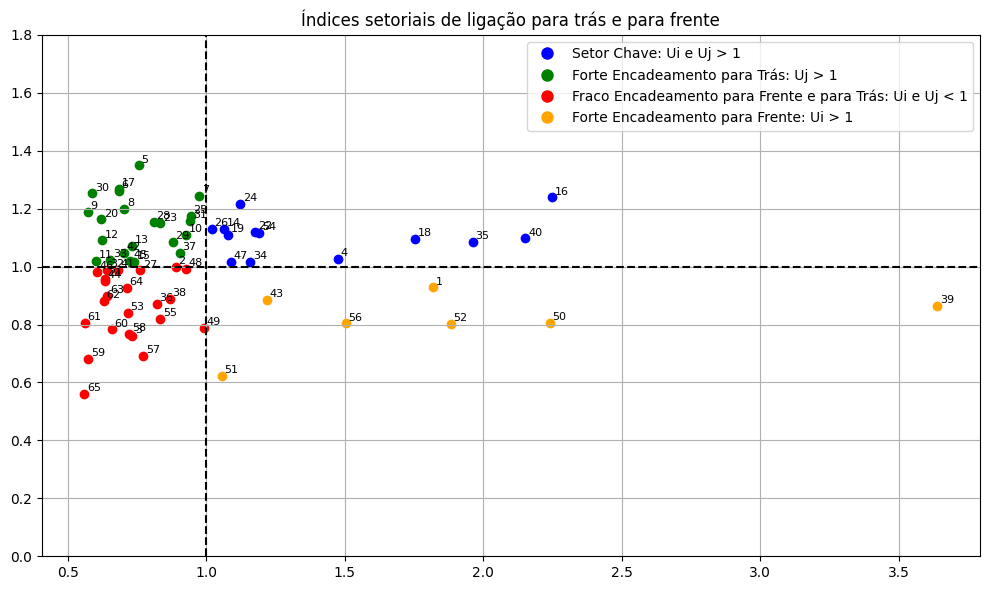

In [59]:
def classificar_setor(ui, uj):
    if ui > 1 and uj > 1:
        return 'Setor Chave'
    elif uj > 1:
        return 'Encadeamento para Trás'
    elif ui > 1:
        return 'Encadeamento para Frente'
    else:
        return 'Fraco Encadeamento'

# Aplica a classificação
Setores_chave['Tipo'] = Setores_chave.apply(lambda row: classificar_setor(row['Ui'], row['Uj']), axis=1)

# Cores para cada tipo
cores = {
    'Setor Chave': 'blue',
    'Encadeamento para Trás': 'green',
    'Encadeamento para Frente': 'orange',
    'Fraco Encadeamento': 'red'
}

# Plot
fig, ax = plt.subplots(figsize=(10, 6))  # Diminuindo o tamanho do gráfico

for tipo, grupo in Setores_chave.groupby('Tipo'):
    ax.scatter(grupo['Ui'], grupo['Uj'], label=tipo, color=cores[tipo])
    for i, row in grupo.iterrows():
        ax.text(row['Ui'] + 0.01, row['Uj'] + 0.01, str(i), fontsize=8)

# Linhas divisórias dos quadrantes
ax.axhline(y=1, color='black', linestyle='--')
ax.axvline(x=1, color='black', linestyle='--')

# Títulos
ax.set_title('Índices setoriais de ligação para trás e para frente')

# Ajuste do eixo X e Y

ax.set_ylim(0, 1.8)  # Ajuste o limite superior do eixo Y para 1.5

# Legenda personalizada dentro do gráfico
legendas = [
    ('Setor Chave: Ui e Uj > 1', 'blue'),
    ('Forte Encadeamento para Trás: Uj > 1', 'green'),
    ('Fraco Encadeamento para Frente e para Trás: Ui e Uj < 1', 'red'),
    ('Forte Encadeamento para Frente: Ui > 1', 'orange')
]
handles = [plt.Line2D([0], [0], marker='o', color='w', label=txt, markerfacecolor=cor, markersize=10) for txt, cor in legendas]

# Coloca a legenda dentro do gráfico (ajustando a posição para 'best')
ax.legend(handles=handles, loc='upper right')

plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


In [60]:
Setores_chave_br = Setores_chave[Setores_chave['Setor'] == 'setor chave']
Setores_chave_br

,Ui,Uj,Setor,Nome_Setores,Tipo
4,1.474749,1.026197,setor chave,Extração,Setor Chave
14,1.064917,1.129202,setor chave,"Fabricação de celulose, papel e produtos de papel",Setor Chave
16,2.249903,1.238626,setor chave,Refino de petróleo e coquerias,Setor Chave
18,1.753327,1.095325,setor chave,Fabricação de químicos orgânicos e inorgânicos...,Setor Chave
19,1.078604,1.107972,setor chave,"Fabricação de defensivos, desinfestantes, tint...",Setor Chave
22,1.176814,1.119447,setor chave,Fabricação de produtos de borracha e de materi...,Setor Chave
24,1.122614,1.214835,setor chave,"Produção de ferro-gusa/ferroligas, siderurgia ...",Setor Chave
26,1.018924,1.130727,setor chave,"Fabricação de produtos de metal, exceto máquin...",Setor Chave
34,1.157361,1.014683,setor chave,"Manutenção, reparação e instalação de máquinas...",Setor Chave
35,1.962532,1.085411,setor chave,"Energia elétrica, gás natural e outras utilidades",Setor Chave


## Impacto Sistêmico

### Choque no Emprego

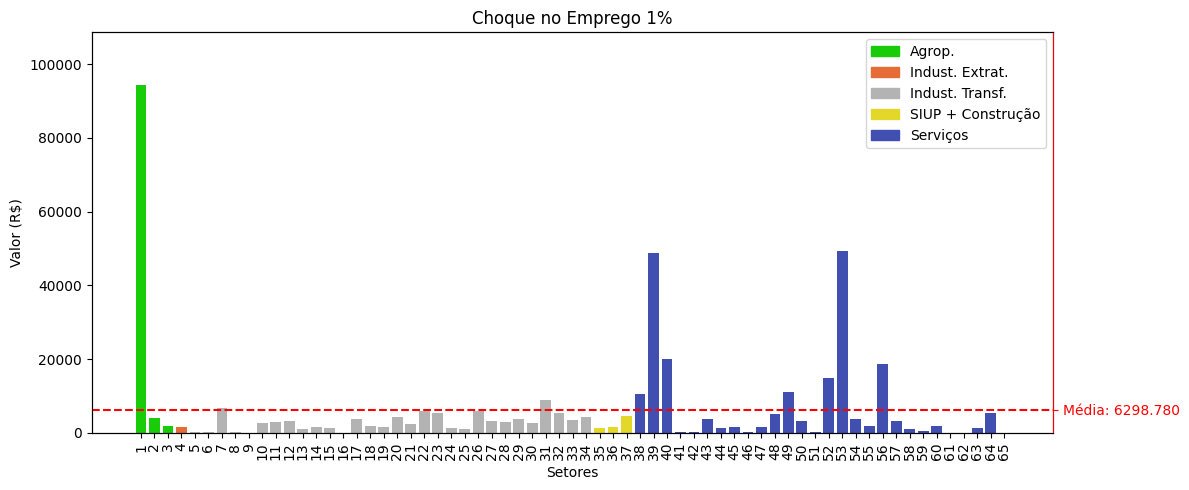

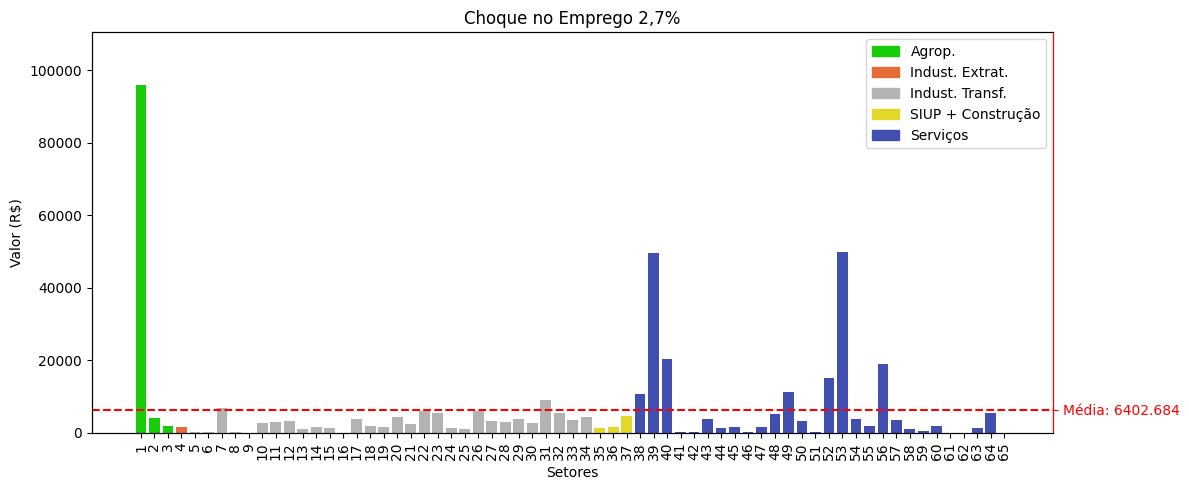

In [61]:
Mult_vars['P&D'] # p&d
Mult_vars['Demanda_Total'] # X

PeD1 = Mult_vars['P&D'] * 1.01 #aumento 1%
PeD2 = Mult_vars['P&D'] * 1.027 #aumento 2,7%

PeD1_1 = matriz_inversa @ PeD1
PeD2_2 = matriz_inversa @ PeD2

Novo_x1 = Mult_vars['Demanda_Total'] + PeD1_1
Novo_x2 = Mult_vars['Demanda_Total'] + PeD2_2

E_x1 = Mult_vars_inferior['Fator trabalho (ocupações)'] / Novo_x1
E_x2 = Mult_vars_inferior['Fator trabalho (ocupações)'] / Novo_x2

C_e1 = np.diag(E_x1)
C_e2 = np.diag(E_x2)

Novos_Empregos1 = C_e1 @ PeD1_1
Novos_Empregos2 = C_e2 @ PeD2_2

plot_multiplicador(Novos_Empregos1, titulo='Choque no Emprego 1%', xlabel='Setores', ylabel='Valor (R$)')
plot_multiplicador(Novos_Empregos2, titulo='Choque no Emprego 2,7%', xlabel='Setores', ylabel='Valor (R$)')

### Choque na Renda

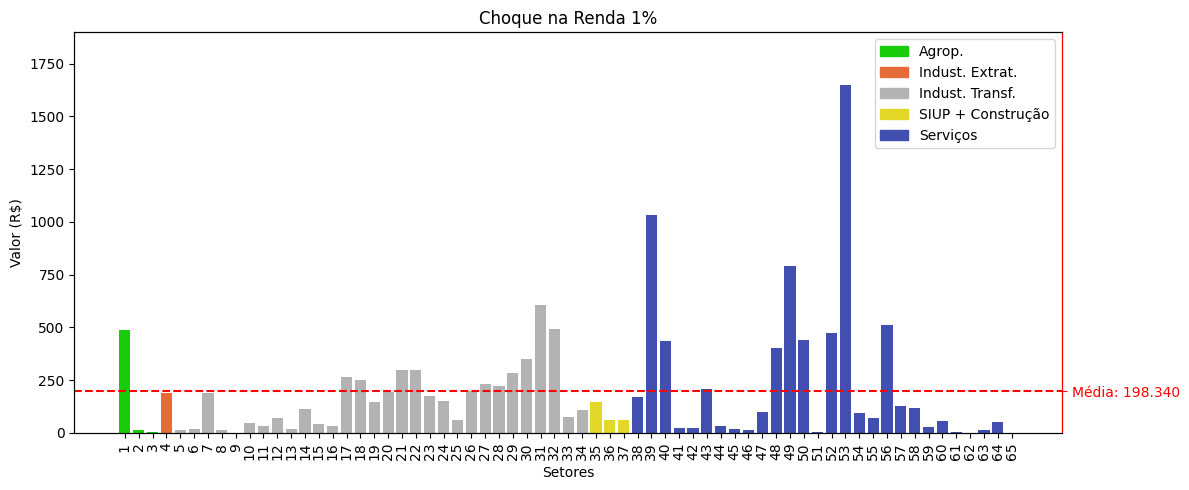

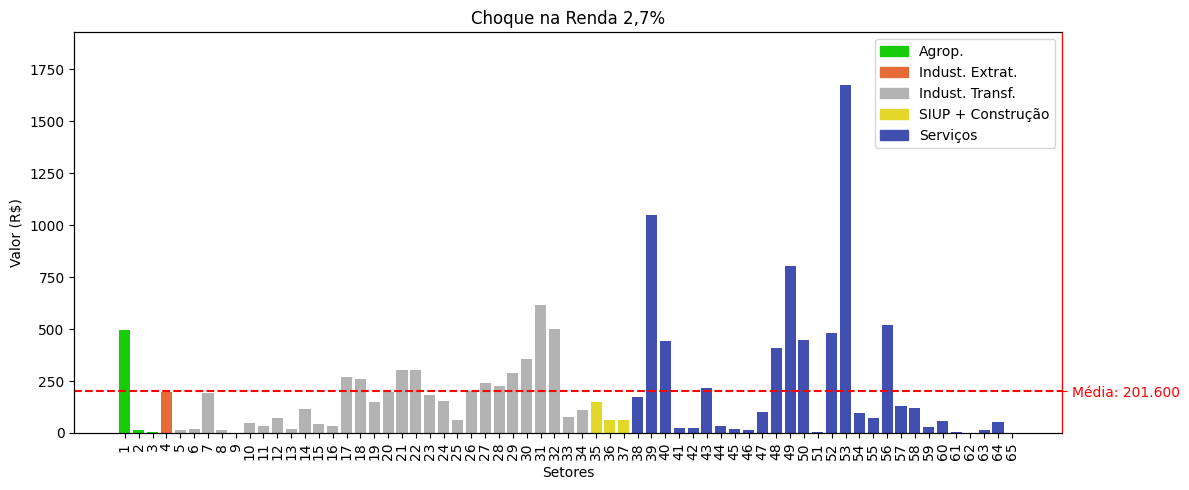

In [62]:
R_x1 = Mult_vars_inferior['Remunerações'] / Novo_x1
R_x2 = Mult_vars_inferior['Remunerações'] / Novo_x2

C_r1 = np.diag(R_x1)
C_r2 = np.diag(R_x2)

Novos_Rendas1 = C_r1 @ PeD1_1
Novos_Rendas2 = C_r2 @ PeD2_2

plot_multiplicador(Novos_Rendas1, titulo='Choque na Renda 1%', xlabel='Setores', ylabel='Valor (R$)')
plot_multiplicador(Novos_Rendas2, titulo='Choque na Renda 2,7%', xlabel='Setores', ylabel='Valor (R$)')

### Choque Cap. know

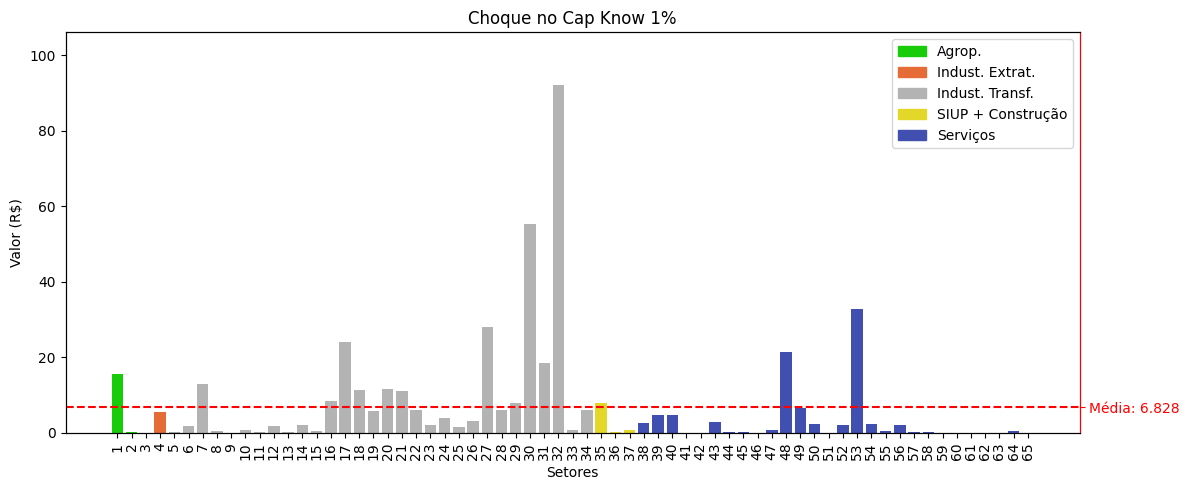

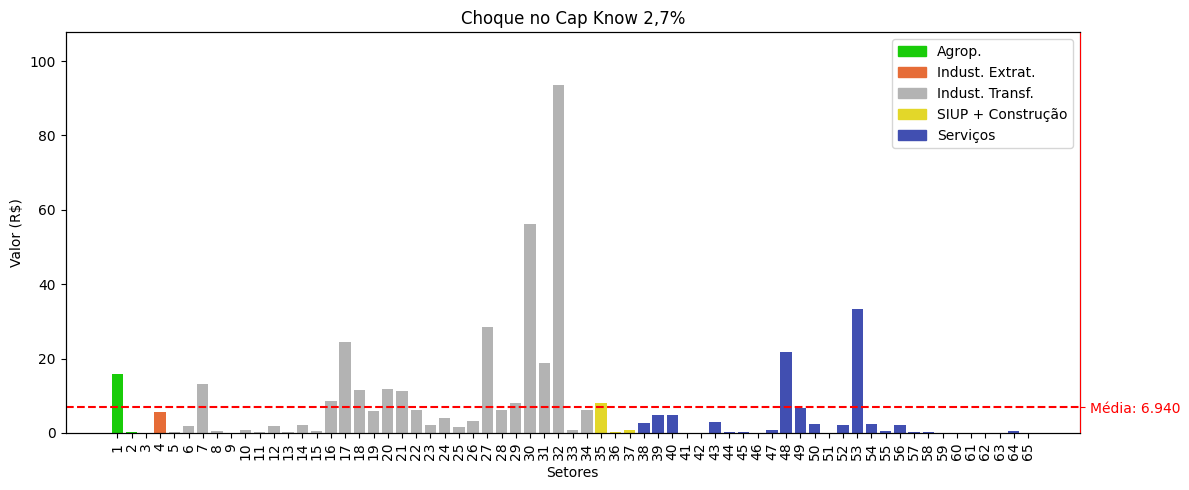

In [63]:
K_x1 = Mult_vars_inferior['Cap Know'] / Novo_x1
K_x2 = Mult_vars_inferior['Cap Know'] / Novo_x2

C_k1 = np.diag(K_x1)
C_k2 = np.diag(K_x2)

Novos_Know1 = C_k1 @ PeD1_1
Novos_Know2 = C_k2 @ PeD2_2

plot_multiplicador(Novos_Know1, titulo='Choque no Cap Know 1%', xlabel='Setores', ylabel='Valor (R$)')
plot_multiplicador(Novos_Know2, titulo='Choque no Cap Know 2,7%', xlabel='Setores', ylabel='Valor (R$)')